In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
import seaborn as sns
import time as time
import math as math

### Refresher
##### What is the payoff of a call and a put?

# Exercise 1: European Options Pricer

BS European call option:
$$C = N(d_1)S_t - N(d_2)K e^{-r(T-t)}$$

BS European put option:
$$P = N(-d_2)K e^{-r(T-t)} - N(-d_1)S_t$$

where: 
- $N(\cdot)$ is the standard normal cumulative distribution function
- $d_1 = \frac{1}{\sigma\sqrt{(T-t)}}\big[\ln\big(\frac{S_t}{K}\big) + \big(r - d+ \frac{\sigma^2}{2} \big)(T-t) \big]$
- $d_2 = d_1 - \sigma \sqrt{T-t}$
- $t$ = contract start date in year
- $T$ = contract expiry date in year
- $S_t$ = spot price at $t$ 
- $K$ = strike price
- $\sigma$ = annualised volatility
- $r$ = annual risk-free rate
- $d$ = dividend yield

#### Check your implementation
Test case 1
- Inputs: $S_t = 100$ ; $K = 98$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ call
- Output: $C = 3.22$

Test case 2
- Inputs: $S_t = 125$ ; $K = 128$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ put
- Output: $P = 4.41$

In [ ]:
def bs_eu_option(St, K, sigma , delta_t, r, d, option_type): 
    d_1 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    d_2 = d_1 - (sigma*np.sqrt(delta_t))
    
    if option_type == "call":
        return norm.cdf(d_1) * St - norm.cdf(d_2) * K * np.exp(-r * delta_t)
    elif option_type == "put":
        return norm.cdf(-d_2) * K * np.exp(-r * delta_t) -norm.cdf(-d_1) * St
    else:
        print("Option type is invalid, please check")
        

In [ ]:
# Want to investigate effect of volatitlity on N(d1) and N(d2)
St = 125
K = 128
sigma = [1, 5, 10, 25, 50, 75, 100]
delta_t = 100/365
r = 0
d = 0

d_1 = [-(np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t)) for sigma in sigma]
d_2 = [-((np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t)) - (sigma*np.sqrt(delta_t))) for sigma in sigma]

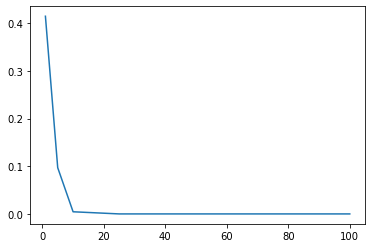

In [ ]:
plt.plot(sigma, norm.cdf(d_1))

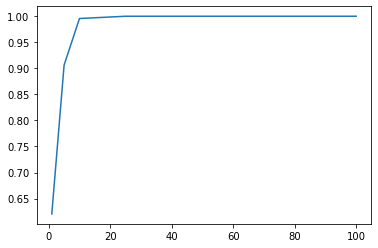

In [ ]:
plt.plot(sigma, norm.cdf(d_2))

In [ ]:
round(bs_eu_option(125, 128, 0.1, 100/365, 0, 0, "put"),2)

4.41e+00

Notice that you could have written the options prices in this form
$$\text{Price} = \omega N(\omega d_1)S_t e^{-d(T-t)} - \omega N(\omega d_2)K e^{-r(T-t)}, \text{where } \omega = \begin{cases} 1, & \text{if Call} \\ -1, & \text{if Put} \end{cases}$$

## What do $N(d_1)$ and $N(d_2)$ mean?

$N(d_1)$ describes the rate of change of call option price with respect to change in underlying asset spot price, also called Delta ($\Delta$).
$$N(d_1) = \frac{dC}{dS} $$


$N(d_2)$ represents the probability that call option expires in the money. 
$$N(d_2) = P(S_T > K) $$

---
## Think
What is the probability of a call option expires out the money?

# Exercise 2: Binary Option Pricer

BS Binary call option:
$$C = N(d_2) e^{-r(T-t)}$$

BS Binary put option:
$$P = N(-d_2) e^{-r(T-t)}$$

where: 
- $N(\cdot)$ is the standard normal cumulative distribution function
- $d_1 = \frac{1}{\sigma\sqrt{(T-t)}}\big[\ln\big(\frac{S_t}{K}\big) + \big(r - d+ \frac{\sigma^2}{2} \big)(T-t) \big]$
- $d_2 = d_1 - \sigma \sqrt{T-t}$
- $t$ = contract start date in year
- $T$ = contract expiry date in year
- $S_t$ = spot price at $t$ 
- $K$ = strike price
- $\sigma$ = annualised volatility
- $r$ = annual risk-free rate
- $d$ = dividend yield


#### Check your implementation
Test case 1
- Inputs: $S_t = 100$ ; $K = 98$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ call
- Output: $C = 0.64$

Test case 2
- Inputs: $S_t = 125$ ; $K = 128$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ put
- Output: $P = 0.68$

In [2]:
def bs_binary_option(St, K, sigma , delta_t, r, d, option_type):
    d_1 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    d_2 = d_1 - (sigma*np.sqrt(delta_t))
    
    if option_type == "call":
        print(d_2)
        return norm.cdf(d_2) * np.exp(-r * delta_t)
    elif option_type == "put":
        print(d_2)
        return norm.cdf(-d_2) * np.exp(-r * delta_t)
    else:
        print("Option type is invalid, please check")

In [5]:
bs_binary_option(St = 100, K = 100, sigma = 0.1 , delta_t = 2/31536000, r = 0, d=0, option_type = "call")

-1.2591622608656234e-05


0.49999497666936266

In [ ]:
round(bs_binary_option(St = 100, K = 100, sigma = 100 , delta_t = 1/365, r = 0, d = 0, option_type = "call"),2)

-2.617119612951068


0.0

In [ ]:
round(bs_binary_option(St = 100, K = 100, sigma = 100 , delta_t = 1/365, r = 0, d = 0, option_type = "put"),2)

-2.617119612951068


1.0

In [ ]:
round(bs_binary_option(St = 125, K = 128, sigma = 0.1 , delta_t = 100/365, r = 0, d = 0, option_type = "put"),2)

-0.47927480094666397


0.68

# Exercise 3: Check for Mispricing

---

Pricing parameters: \
$S_t = 6135.34$ ; $K = 6135.34$ ; $\sigma = 1.0$ ; $T-t = \frac{1}{60 \times 24 \times 365}$ ; $r = 0$ ; $d = 0$

Markup:\
Commission $= \$ 0.012$

---

Reproduce the payout (payoff) for Rise/Fall contract (binary option) on Vol 100 (1s) index shown in the image below. 
![mispricing_check.png](attachment:mispricing_check.png)

In [ ]:
stake = 15
comm = 0.012

# Call option pricing
contract_unit_price = bs_binary_option(6135.34, 6135.34, 1, 1/(60*24*365), 0, 0, option_type = "call") + comm
num_contracts = stake/contract_unit_price
payout = 1 * num_contracts
print(payout) # 29.31

-0.0006896715738353066
2.9312627052077286e+01


In [ ]:
# Put option pricing
contract_unit_price = bs_binary_option(6135.34, 6135.34, 1, 1/(60*24*365), 0, 0, option_type = "put") + comm
num_contracts = stake/contract_unit_price
payout = 1 * num_contracts
print(payout) # 29.28

-0.0006896715738353066
2.9281139868540375e+01


# Exercise 4: Price Divergence
---

Pricing parameters: \
$S_t = 6135.34$ ; $K = 6135.34$ ; $\sigma = 1.0$ ; $r = 0$ ; $d = 0$

Markup:\
Commission $= \$ 0.012$

---

Reproduce the payouts (payoff) for Rise/Fall contracts (binary options) on Vol 100 (1s) index shown in the image below. Are the contracts mispriced?

![BO_price_divergence.png](attachment:BO_price_divergence.png)

In [10]:
# 5 ticks duration contract

stake = 100
comm = 0.012

# Rise option pricing
rise_contract_unit_price = bs_binary_option(6135.34, 6135.34, 0.1, 10/(60*60*24*365), 0, 0, option_type = "call") + comm
rise_num_contracts = stake/rise_contract_unit_price
rise_payout = 1 * rise_num_contracts
print(rise_payout) # 19.53

# Put option pricing
fall_contract_unit_price = bs_binary_option(6135.34, 6135.34, 0.1, 10/(60*60*24*365), 0, 0, option_type = "put") + comm
fall_num_contracts = stake/fall_contract_unit_price
fall_payout = 1 * fall_num_contracts
print(fall_payout) # 19.53

-2.815572409997858e-05
195.31678495605738
-2.815572409997858e-05
195.30821523194945


In [ ]:
# 100 days duration contract

stake = 10
comm = 0.012

# Call option pricing
call_contract_unit_price = bs_binary_option(6135.34, 6135.34, 1, 100/365, 0, 0, option_type = "call") + comm
call_num_contracts = stake/call_contract_unit_price
call_payout = 1 * call_num_contracts
print(call_payout) # 24.46

# Put option pricing
put_contract_unit_price = bs_binary_option(6135.34, 6135.34, 1, 100/365, 0, 0, option_type = "put") + comm
put_num_contracts = stake/put_contract_unit_price
put_payout = 1 * put_num_contracts
print(put_payout) # 16.25

-0.26171196129510677
2.446352953378045e+01
-0.26171196129510677
1.6254130311858596e+01


## Why the divergence?


In [ ]:
def call_prob_ITM(St, K, sigma , delta_t, r, d):
    d2 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t)) - (sigma*np.sqrt(delta_t))
    return norm.cdf(d2)

def put_prob_ITM(St, K, sigma , delta_t, r, d):
    d2 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t)) - (sigma*np.sqrt(delta_t))
    return norm.cdf(-d2)

### Recall the distribution of stock prices, why?

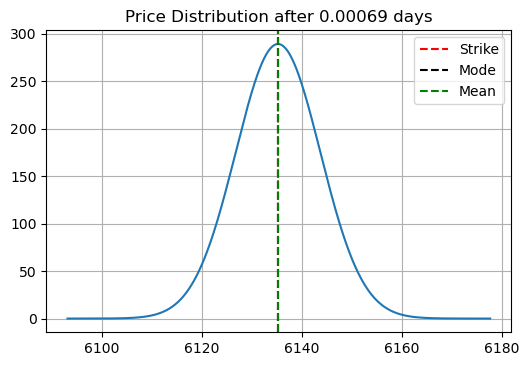

Mode = 6135.22
Mean = 6135.29
Median = 6135.24
Call ITM prob = 0.50
Put ITM prob = 0.50
European Call Expected Payoff = 10.60
European Put Expected Payoff = 10.56


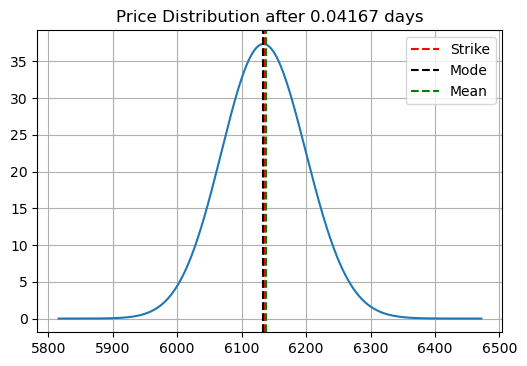

Mode = 6133.83
Mean = 6138.16
Median = 6135.24
Call ITM prob = 0.50
Put ITM prob = 0.50
European Call Expected Payoff = 83.07
European Put Expected Payoff = 80.85


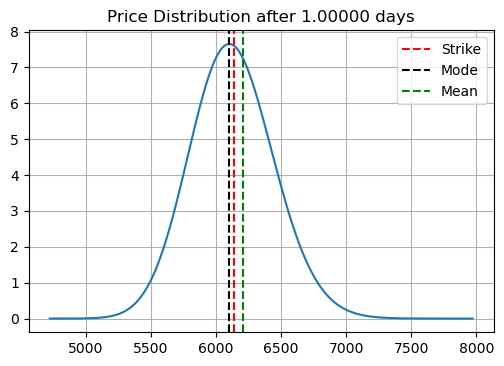

Mode = 6101.77
Mean = 6205.53
Median = 6135.24
Call ITM prob = 0.49
Put ITM prob = 0.51
European Call Expected Payoff = 429.74
European Put Expected Payoff = 376.30


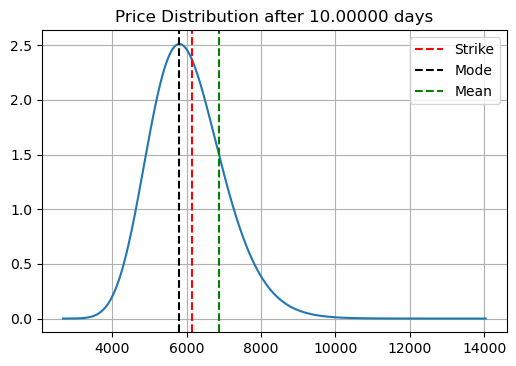

Mode = 5807.64
Mean = 6860.14
Median = 6135.24
Call ITM prob = 0.47
Put ITM prob = 0.53
European Call Expected Payoff = 1593.59
European Put Expected Payoff = 1045.94


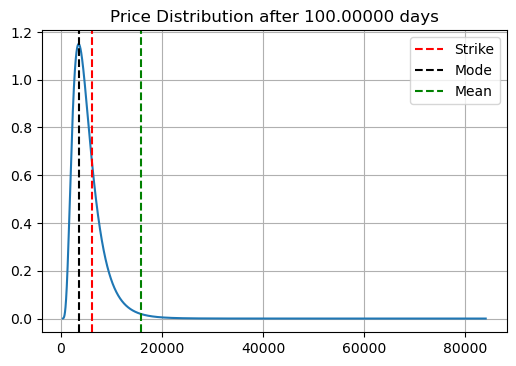

Mode = 3547.46
Mean = 15970.87
Median = 6135.24
Call ITM prob = 0.40
Put ITM prob = 0.60
European Call Expected Payoff = 9377.13
European Put Expected Payoff = 2390.17


In [ ]:
# Let's check the duration's impact
r = 0
d = 0
S0 = 6135.24
K = 6135.24
sigma = 1

# 1 minute, 1 hour, 1 day, 10 days and 100 days
duration = [60, 3600, 24*3600, 240*3600, 2400*3600] 

for T in duration:
    # compute lognormal pdf
    mu = (r - d - sigma ** 2)*T / (365*24*60*60)
    var = sigma ** 2 * T / (365*24*60*60)
    S = np.exp(np.linspace(-np.sqrt(var)*5, np.sqrt(var)*5, 10000)) * S0
    pdf = np.exp(-(np.log(S/S0) - mu) ** 2/ (2*var)) / ((S/S0)*np.sqrt(var*2*np.pi))
    
    
    # stats
    mode = S[np.argmax(pdf)]
    mean = np.mean(S)
    median = np.median(S)

    # European option expected payoff
    call_prob = call_prob_ITM(St = S0, K = S0, sigma = 1, delta_t = T/(365*24*60*60), r = r, d = d)
    put_prob = put_prob_ITM(St = S0, K = S0, sigma = 1, delta_t = T/(365*24*60*60), r = r, d = d)
    call_expected_payoff = call_prob * np.mean(S[S>K] - K)
    put_expected_payoff = put_prob * np.mean(K - S[S < K])

    # plot
    plt.figure(dpi = 100)
    plt.plot(S, pdf)
    plt.axvline(x = S0, color = "red",  linestyle='dashed', label = "Strike")
    plt.axvline(x = mode, color = "black",  linestyle='dashed', label = "Mode")
    plt.axvline(x = mean, color = "green",  linestyle='dashed', label = "Mean")
    plt.title("Price Distribution after {:.5f} days".format(T/(24*3600)))
    plt.grid()
    plt.legend()
    plt.show()
    print("Mode = {:.2f}".format(mode))
    print("Mean = {:.2f}".format(mean))
    print("Median = {:.2f}".format(median))
    print("Call ITM prob = {:.2f}".format(call_prob))
    print("Put ITM prob = {:.2f}".format(put_prob))
    print("European Call Expected Payoff = {:.2f}".format(call_expected_payoff))
    print("European Put Expected Payoff = {:.2f}".format(put_expected_payoff))




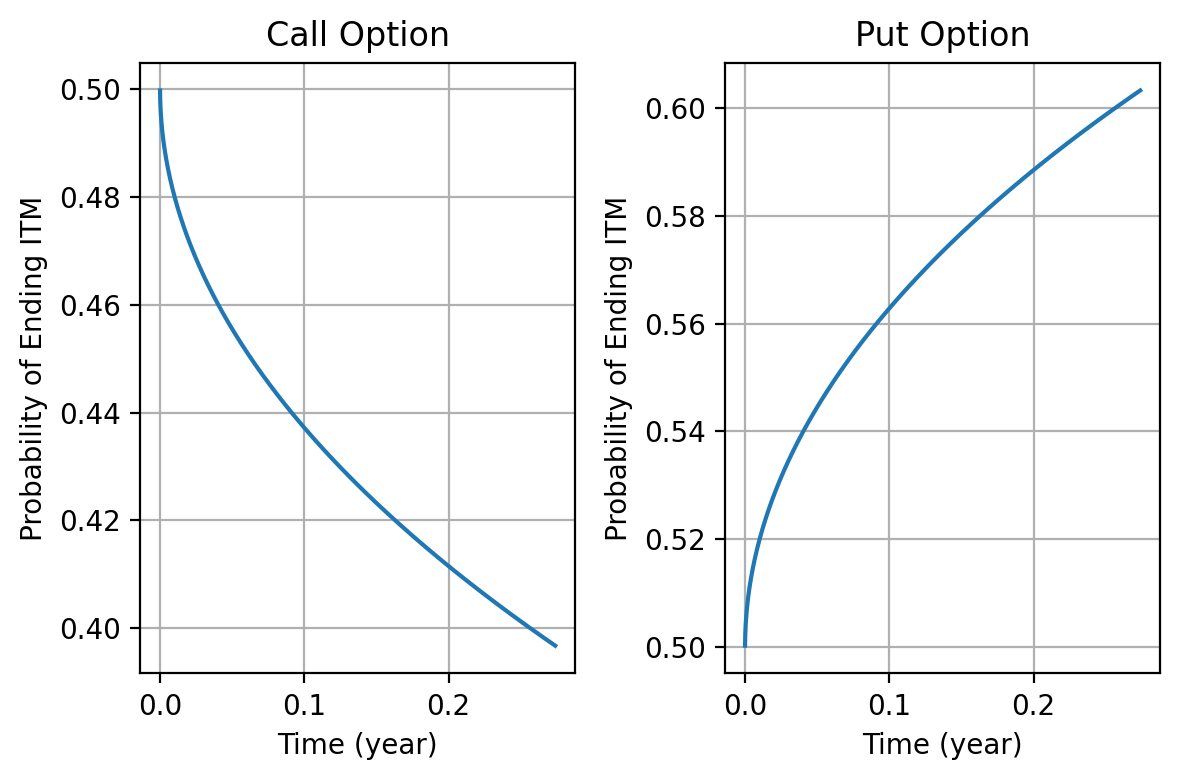

In [ ]:
# Plot probability of ITM vs Duration
duration = np.linspace(60, 86400*100, 10000)

call_prob = call_prob_ITM(St = 6135.34, K = 6135.34, sigma = 1 , delta_t = duration/(365*86400), r = 0, d = 0)
put_prob = put_prob_ITM(St = 6135.34, K = 6135.34, sigma = 1 , delta_t = duration/(365*86400), r = 0, d = 0)

fig, axs = plt.subplots(1,2, dpi = 200)
axs[0].plot(duration/(365*86400), call_prob)
axs[0].set_xlabel("Time (year)")
axs[0].set_ylabel("Probability of Ending ITM")
axs[0].set_title("Call Option")
axs[0].grid()

axs[1].plot(duration/(365*86400), put_prob)
axs[1].set_xlabel("Time (year)")
axs[1].set_ylabel("Probability of Ending ITM")
axs[1].set_title("Put Option")
axs[1].grid()
fig.tight_layout()
plt.show()

# Exercise 5: What happens to option price when volatility increases? 


-2.6171196129510677e-01
-6.54279903237767e-01
-1.308559806475534e+00
-1.9628397097133008e+00
-2.617119612951068e+00
-2.6171196129510677e-01
-6.54279903237767e-01
-1.308559806475534e+00
-1.9628397097133008e+00
-2.617119612951068e+00


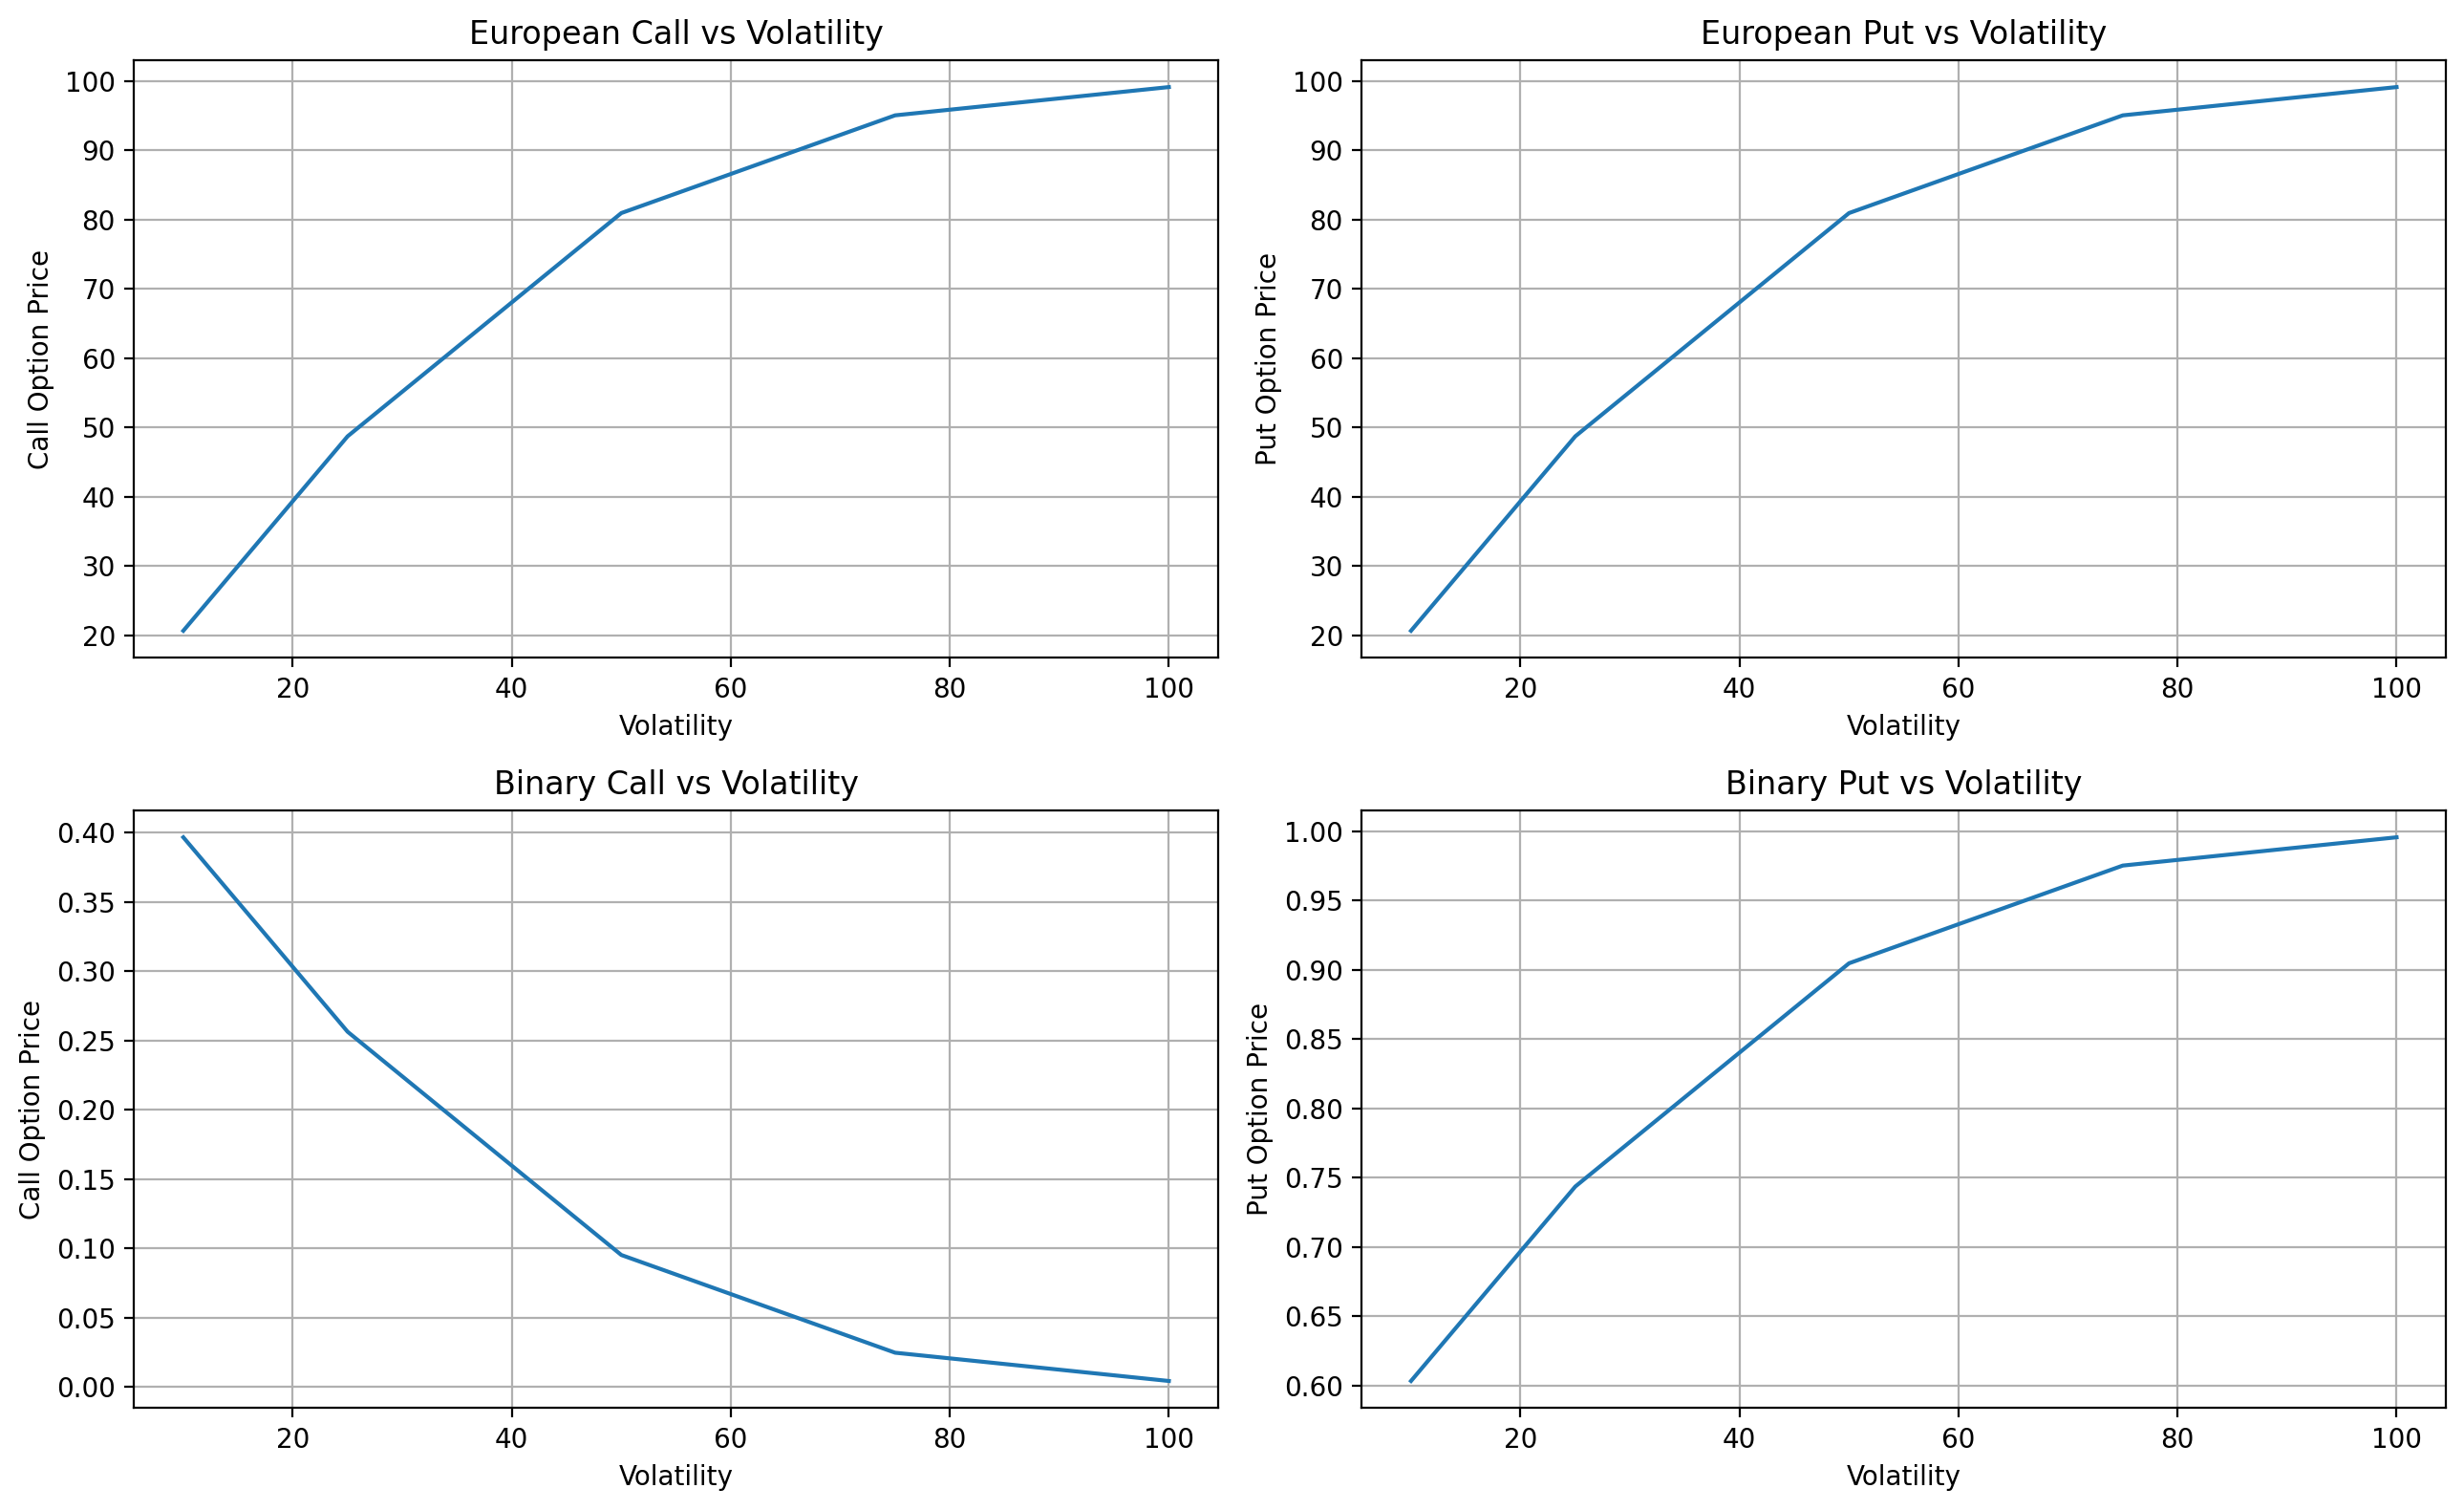

In [ ]:
vols = [10, 25, 50, 75, 100]
eu_call_price = [bs_eu_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "call") for vol in vols]
eu_put_price = [bs_eu_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "put") for vol in vols]

binary_call_price = [bs_binary_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "call") for vol in vols]
binary_put_price = [bs_binary_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "put") for vol in vols]

fig, axs = plt.subplots(2, 2, dpi = 200, figsize = (13,8))
axs[0,0].plot(vols, eu_call_price)
axs[0,0].set_xlabel("Volatility")
axs[0,0].set_ylabel("Call Option Price")
axs[0,0].set_title("European Call vs Volatility")
axs[0,0].grid()

axs[0,1].plot(vols, eu_put_price)
axs[0,1].set_xlabel("Volatility")
axs[0,1].set_ylabel("Put Option Price")
axs[0,1].set_title("European Put vs Volatility")
axs[0,1].grid()

axs[1,0].plot(vols, binary_call_price)
axs[1,0].set_xlabel("Volatility")
axs[1,0].set_ylabel("Call Option Price")
axs[1,0].set_title("Binary Call vs Volatility")
axs[1,0].grid()

axs[1,1].plot(vols, binary_put_price)
axs[1,1].set_xlabel("Volatility")
axs[1,1].set_ylabel("Put Option Price")
axs[1,1].set_title("Binary Put vs Volatility")
axs[1,1].grid()

fig.tight_layout()
plt.show()

# Exercise 6: Monte Carlo Pricer

### Geometric Brownian Motion
Geometric brownian motion (GBM) is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion with drift. It is frequently used in mathematical finance to model asset prices in the Black-Scholes model.


$$ S_T = S_0 \exp \big[ \big(\mu - \frac{\sigma^2}{2} \big)T + \sigma W_T \big]$$

where:
- $S_T$ : spot price at time $T$ 
- $S_0$ : Initial stock price
- $\mu = r - d$ : drift
- $\sigma$ : volatility
- $W_t \sim N(0, t)$: Brownian motion

#### Discretised GBM
$$S_{t} = S_{t-1} \exp \big[ \big(\mu - \frac{\sigma^2}{2} \big)dt + \sigma \sqrt{dt} dW_t \big]$$

Write a Monte Carlo pricer (at least 10,000 GBM price paths) to determine the following option price: 
- European call: $S_t = 100$ ; $K = 95$ ; $\sigma = 0.08$ ; $T-t = \frac{1}{365}$ ; $r = 0$ ; $d = 0$ 
- European put: $S_t = 110$ ; $K = 110$ ; $\sigma = 0.25$ ; $T-t = \frac{1}{3650}$ ; $r = 0$ ; $d = 0$ 



In [ ]:
def mc_pricer(St, K, sigma, delta_t, r, d, n_sample, option_type):
        dt = 1/(365*86400)
        n_steps = int(delta_t/dt)-1
        S0 = St
        payoff = 0
        for i in range(n_sample):
            z = np.random.normal(0,1, n_steps)
            S = S0*np.exp(np.cumsum((r-d - sigma**2/2)*dt + sigma*np.sqrt(dt)*z))
            if option_type == "call":
                payoff += max(S[-1] - K, 0)
            elif option_type == "put":
                payoff += max(K - S[-1], 0)
            else:
                raise NotImplementedError("Supported option types: 'call', 'put'")
        return payoff/n_sample * np.exp(-r*delta_t)

In [ ]:
mc_pricer(St = 100, K = 98, sigma = 0.08, delta_t = 1/365, r = 0, d = 0, n_sample = 10000, option_type = "call")

2.000526908612704

In [ ]:
mc_pricer(St = 110, K = 110, sigma = 0.25, delta_t = 0.1/365, r = 0, d = 0, n_sample = 10000, option_type = "put")

In [ ]:
bs_eu_option(St = 100, K = 98, sigma = 0.08, delta_t = 1/365, r = 0, d = 0, option_type = "call")

In [ ]:
bs_eu_option(St = 110, K = 110, sigma = 0.25, delta_t = 0.1/365, r = 0, d = 0, option_type = "put")

### Compare For Loop vs Vectorised

In [ ]:
dt = 1/(365*86400)
delta_t = 1/365
r = d = 0
sigma = 0.2
n_steps = int(delta_t/dt)-1

In [ ]:
# for loop
start = time.time()

S0 = 100000
S = []
for i in range(n_steps):
    z = np.random.normal(0,1)
    S.append(S0*np.exp((r-d - sigma**2/2)*dt + sigma*np.sqrt(dt)*z))
    S0 = S[-1]
    
print("Time taken = {:.4f}".format(time.time()-start))
np.array(S)

Time taken = 0.3514


array([100004.70842266, 100001.04929926,  99999.2936517 , ...,
       100021.60173698, 100015.11833434, 100015.08863387])

In [ ]:
# Vectorized
start = time.time()

S0 = 100000
z = np.random.normal(0,1, n_steps)
S = S0*np.exp(np.cumsum((r-d - sigma**2/2)*dt + sigma*np.sqrt(dt)*z))

print("Time taken = {:.4f}".format(time.time()-start))
S

Time taken = 0.0031


array([ 99994.63439219,  99988.83531658,  99985.66504719, ...,
       100577.54553233, 100585.32327773, 100582.11654525])

# Exercise 7: Option Trading Strategies

Plot the payoff diagrams of the following trading strategies:
1. Call spread
    - Long one call with strike $K_1$ and short one call with strike $K_2$ (same expiry) ; $K_1$ < $K_2$
1. Put spread
    - Long one put with strike $K_2$ and short one put with strike $K_1$ (same expiry); $K_1$ < $K_2$
1. Straddle
    - Long one call and put with same strike and expiry.
1. Strangle 
    - Long one call with strike $K_2 $ and long one put with strike $K_1$ (same expiry) ; $K_1$ < $K_2$


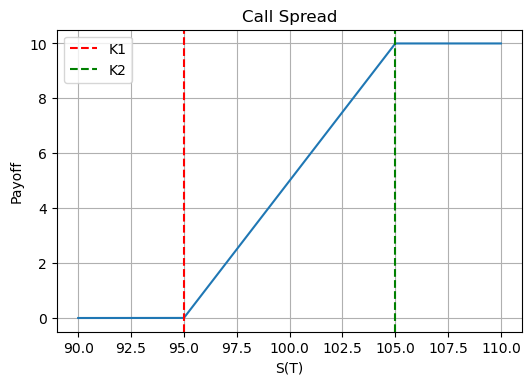

In [ ]:
def call_payoff(S, K):
    return np.maximum(S-K, 0)
    
def call_spread_payoff(S, K1, K2):
    return call_payoff(S, K1) - call_payoff(S, K2)

S = np.linspace(90, 110, 10000)

plt.figure(dpi = 100)
plt.plot(S, call_spread_payoff(S = S, K1 = 95, K2 = 105))
plt.axvline(95, color = "red", linestyle = "--", label = "K1")
plt.axvline(105, color = "green", linestyle = "--", label = "K2")
plt.xlabel("S(T)")
plt.ylabel("Payoff")
plt.title("Call Spread")
plt.legend()
plt.grid()

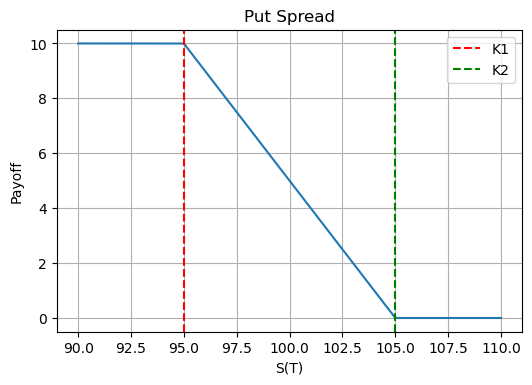

In [ ]:
def put_payoff(S, K):
    return np.maximum(K-S, 0)

def put_spread_payoff(S, K1, K2):
    return put_payoff(S, K2) - put_payoff(S, K1)

S = np.linspace(90, 110, 10000)

plt.figure(dpi = 100)
plt.plot(S, put_spread_payoff(S = S, K1 = 95, K2 = 105))
plt.axvline(95, color = "red", linestyle = "--", label = "K1")
plt.axvline(105, color = "green", linestyle = "--", label = "K2")
plt.xlabel("S(T)")
plt.ylabel("Payoff")
plt.title("Put Spread")
plt.legend()
plt.grid()

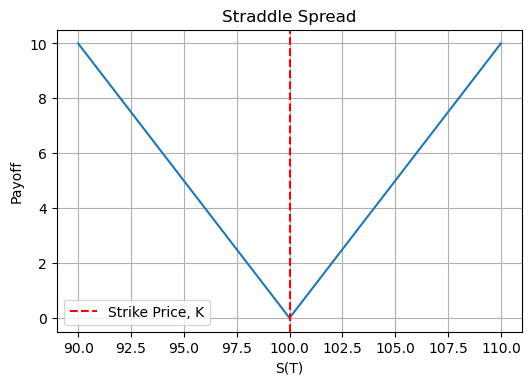

In [ ]:
def straddle_payoff(S, K):
    return call_payoff(S, K) + put_payoff(S, K)

S = np.linspace(90, 110, 10000)

plt.figure(dpi = 100)
plt.plot(S, straddle_payoff(S = S, K = 100))
plt.axvline(100, color = "red", linestyle = "--", label = "Strike Price, K")
plt.xlabel("S(T)")
plt.ylabel("Payoff")
plt.title("Straddle Spread")
plt.legend()
plt.grid()

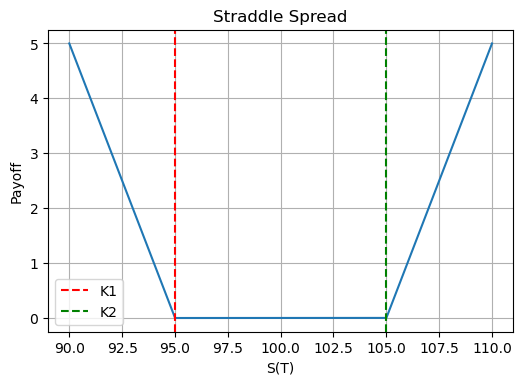

In [ ]:
def straddle_payoff(S, K1, K2):
    return call_payoff(S, K2) + put_payoff(S, K1)

S = np.linspace(90, 110, 10000)

plt.figure(dpi = 100)
plt.plot(S, straddle_payoff(S = S, K1 = 95, K2 = 105))
plt.axvline(95, color = "red", linestyle = "--", label = "K1")
plt.axvline(105, color = "green", linestyle = "--", label = "K2")
plt.xlabel("S(T)")
plt.ylabel("Payoff")
plt.title("Straddle Spread")
plt.legend()
plt.grid()

# Exercise 8: Call Spread / Put Spread Pricing

$$\text{Call Spread} = C(S,K_1) - C(S, K_2)$$

$$\text{Put Spread} = P(S,K_2) - P(S, K_1)$$
where:
- $K_1$ is the lower strike
- $K_2$ is the upper strike

Remember:
- Call spread is to go long on one call at strike $K_1$ and short one call at strike $K_2$ with the same expiry date, and
- Put spread is to go long on one put at strike $K_2$ and short one put at strike $K_1$ with the same expiry date

#### Check your implementation
Test case 1
- Inputs: $S_t = 100$ ; $K_1 = 95$ ; $K_2 = 105$; $\sigma = 0.5$ ; $T-t = \frac{1}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ call
- Output: $C = 4.99$

Test case 2
- Inputs: $S_t = 100$ ; $K_1 = 92$ ; $K_2 = 102$; $\sigma = 0.5$ ; $T-t = \frac{1}{365}$ ; $r = 0$ ; $d = 0$ ;  option_type $=$ put
- Output: $P = 2.34$


In [ ]:
def spread_option(St, K1, K2, sigma , delta_t, r, d, option_type):
    k1_d1 = (np.log(St/K1)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    k1_d2 = k1_d1 - (sigma*np.sqrt(delta_t))
    
    k2_d1 = (np.log(St/K2)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    k2_d2 = k2_d1 - (sigma*np.sqrt(delta_t))
    
    if option_type == "call":
        return (norm.cdf(k1_d1) * St - norm.cdf(k1_d2) * K1 * np.exp(-r * delta_t)) - (norm.cdf(k2_d1) * St - norm.cdf(k2_d2) * K2 * np.exp(-r * delta_t))
    elif option_type == "put":
        return (norm.cdf(-k2_d2) * K2 * np.exp(-r * delta_t) - norm.cdf(-k2_d1) * St) - (norm.cdf(-k1_d2) * K1 * np.exp(-r * delta_t) - norm.cdf(-k1_d1) * St)
    else:
        raise NotImplementedError("Supported option types: 'call', 'put'")

In [ ]:
upper = 105
lower = 95
spread_option(St = 100, K1 = lower, K2= upper, sigma = 0.5, delta_t = 1/365, r = 0 , d = 0, option_type = "call")

4.9915874747536115e+00

In [ ]:
upper = 102
lower = 92
spread_option(St = 100, K1 = lower, K2= upper, sigma = 0.5, delta_t = 1/365, r = 0 , d = 0, option_type = "put")

2.3422183876063043e+00

### What happens when strikes are close to each other?

In [ ]:
# Expect to see: price cheaper, because potential upside is extremely capped, i.e. difference between payments received for holding an ITM option and payments paid
# for writing an ITM option leaves the portfolio holder with incredibly little profit when ST > K2 in call spread, and ST < K1 in put spread

upper = 100.1
lower = 99.9
spread_option(St = 100, K1 = lower, K2= upper, sigma = 0.5, delta_t = 1/365, r = 0 , d = 0, option_type = "put") # approx. 10 cents, upside is capped at 20 cents

1.0104328803530649e-01

# Exercise 9: Estimate Volatility
Estimate the annualised volatility of Volatility 100 (1s) index & EURUSD.

## Volatility 100 (1s)'s Volatility

In [5]:
### Read feed data csv file
df = pd.read_csv("vol-75-1s.csv")
df["ts"] = pd.to_datetime(df["ts"])

In [11]:
### Compute volatility
# Method 1
df['log_ret'] = np.log(df["spot"]/df["spot"].shift(1))
#vol = 100*df["log_ret"].std()/np.sqrt(1/(365*86400))
vol = 100*df["log_ret"].std()*np.sqrt(365*86400)
print(vol)

135.79483307514383


In [4]:
# Method 2 
vol = np.sqrt(np.sum(df["log_ret"]**2))*np.sqrt(4)*100
print(vol)

95.92325136928778


## EURUSD's Volatility

In [ ]:
### Read feed data csv file
df = pd.read_csv("EURUSD.csv")

In [ ]:
### Compute volatility
# Method 1
df['log_ret'] = np.log(df["spot"]/df["spot"].shift(1))
vol = 100*df["log_ret"].std()/np.sqrt(1/(250*86400))
print(vol)

7.1668405151575225


In [ ]:
# Method 2
vol = np.sqrt(np.sum(df["log_ret"]**2))*np.sqrt(4)*100
print(vol)

6.790303798802415


# Exercise 10: Binomial tree

### European Binomial Tree

In [ ]:
def combinations(n,k):
    return math.factorial(n)/(math.factorial(n-k) * math.factorial(k))

def european_tree(S0, K, r, T, N, sigma, option_type):
    payoff = 0
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u-d)
    
    for k in range(N+1):
        node_prob = combinations(N,k) * p ** (N-k) * (1-p) ** k
        S = S0 * u ** (N-k) * d ** k
        if option_type == "call":
            payoff += max(S - K, 0) * node_prob
        elif option_type == "put":
            payoff += max(K -S, 0) * node_prob
        else:
            raise NotImplementedError("Supported option types: 'call', 'put'")
    return payoff * np.exp(-r*T)

In [ ]:
european_tree(S0 = 100, K = 105, r = 0, T = 1, N = 2, sigma = 0.1, option_type = "call")

2.370851841739029e+00

### Try it yourself: Implement American Binomial Tree

In [ ]:
def european_tree2(S0, K, r, T, N, sigma, option_type):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u-d)
    S = np.zeros(N+1)
    discount = np.exp(-r * dt)
    
    for i in range(N+1):
        S[i] = S0 * u ** (N-i) * d ** i
        
    payoff = np.zeros(N+1)
    
    for i in range(N+1):
        if option_type == "call":
            payoff[i] = max(S[i] - K, 0)
        elif option_type == "put":
            payoff[i] = max(K - S[i], 0)
        else:
            raise NotImplementedError("Supported option types: 'call', 'put'")
            
    for j in np.arange(N-1, -1, -1):
        for i in range(j+1):
            payoff[i] = discount * (p * payoff[i] + (1-p) * payoff[i+1])
    return payoff[0]

In [ ]:
# Expect to see the same price as the previously defined European Binomial Tree option pricer

european_tree2(S0 = 100, K = 105, r = 0, T = 1, N = 2, sigma = 0.1, option_type = "call")

2.370851841739029e+00

In [ ]:
def american_tree(S0, K, r, T, N, sigma, option_type):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u-d)
    S = np.zeros(N+1)
    discount = np.exp(-r * dt)
    
    for i in range(N+1):
        S[i] = S0 * u ** (N-i) * d ** i
        
    payoff = np.zeros(N+1)
    
    for i in range(N+1):
        if option_type == "call":
            payoff[i] = max(S[i] - K, 0)
        elif option_type == "put":
            payoff[i] = max(K - S[i], 0)
        else:
            raise NotImplementedError("Supported option types: 'call', 'put'")
            
    for j in np.arange(N-1, -1, -1):
        for i in range(j+1):
            payoff[i] = discount * (p * payoff[i] + (1-p) * payoff[i+1])
            S = S0 * u ** (j-1) * d ** i
            if option_type == "call":
                payoff[i] = np.maximum(payoff[i], S-K)
            if option_type == "put":
                payoff[i] = np.maximum(payoff[i], K-S)
    return payoff[0]

In [ ]:
american_tree(S0 = 100, K = 105, r = 0, T = 1, N = 2, sigma = 0.1, option_type = "call")

2.370851841739029e+00

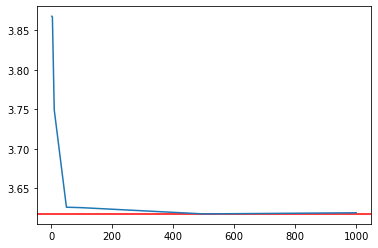

In [ ]:
# Plot out results (Binomial Tree method vs Black-Scholes model European Call option prices)
N = [2, 4, 10, 50, 100, 500, 1000]
bin_prices = [european_tree(S0 = 100, K = 105, r = 0, T = 2, N = n, sigma = 0.1, option_type = "call") for n in N]
bs_prices = bs_eu_option(St = 100, K = 105, r = 0, d = 0, delta_t = 2, sigma = 0.1, option_type = "call")
plt.axhline(y = bs_prices, color = "red", linestyle = "-")
plt.plot(N, bin_prices)